<a href="https://colab.research.google.com/github/pradeepnegi88/practical-statistics/blob/main/StatisticsPractical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

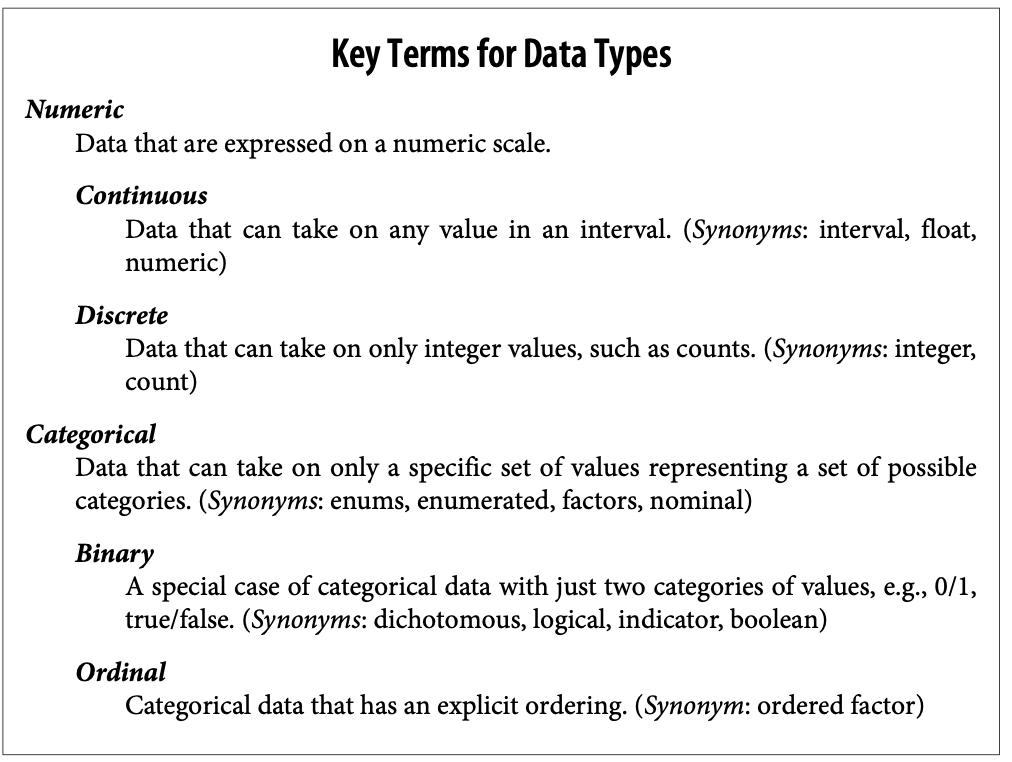

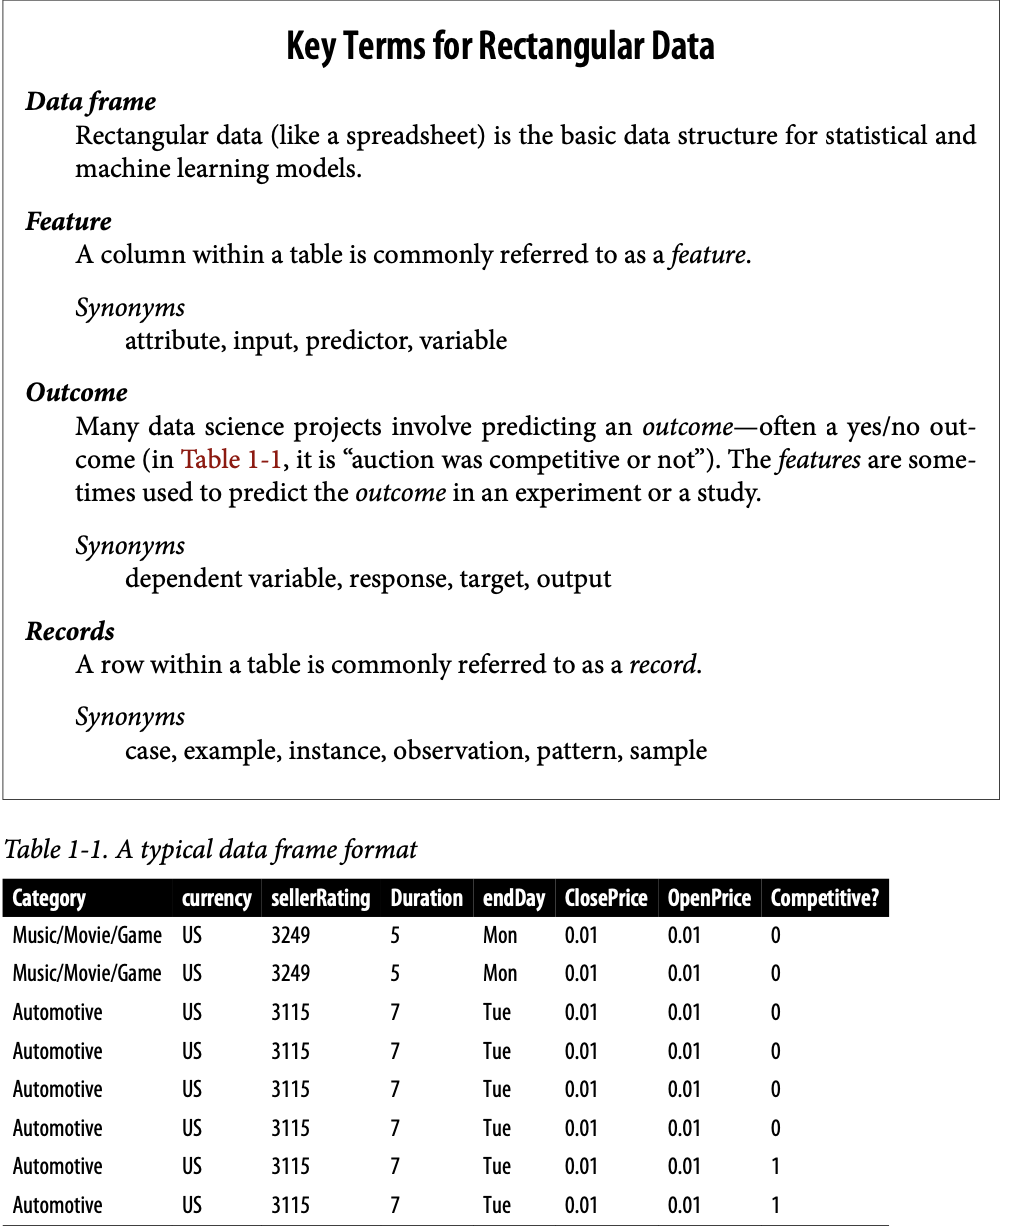

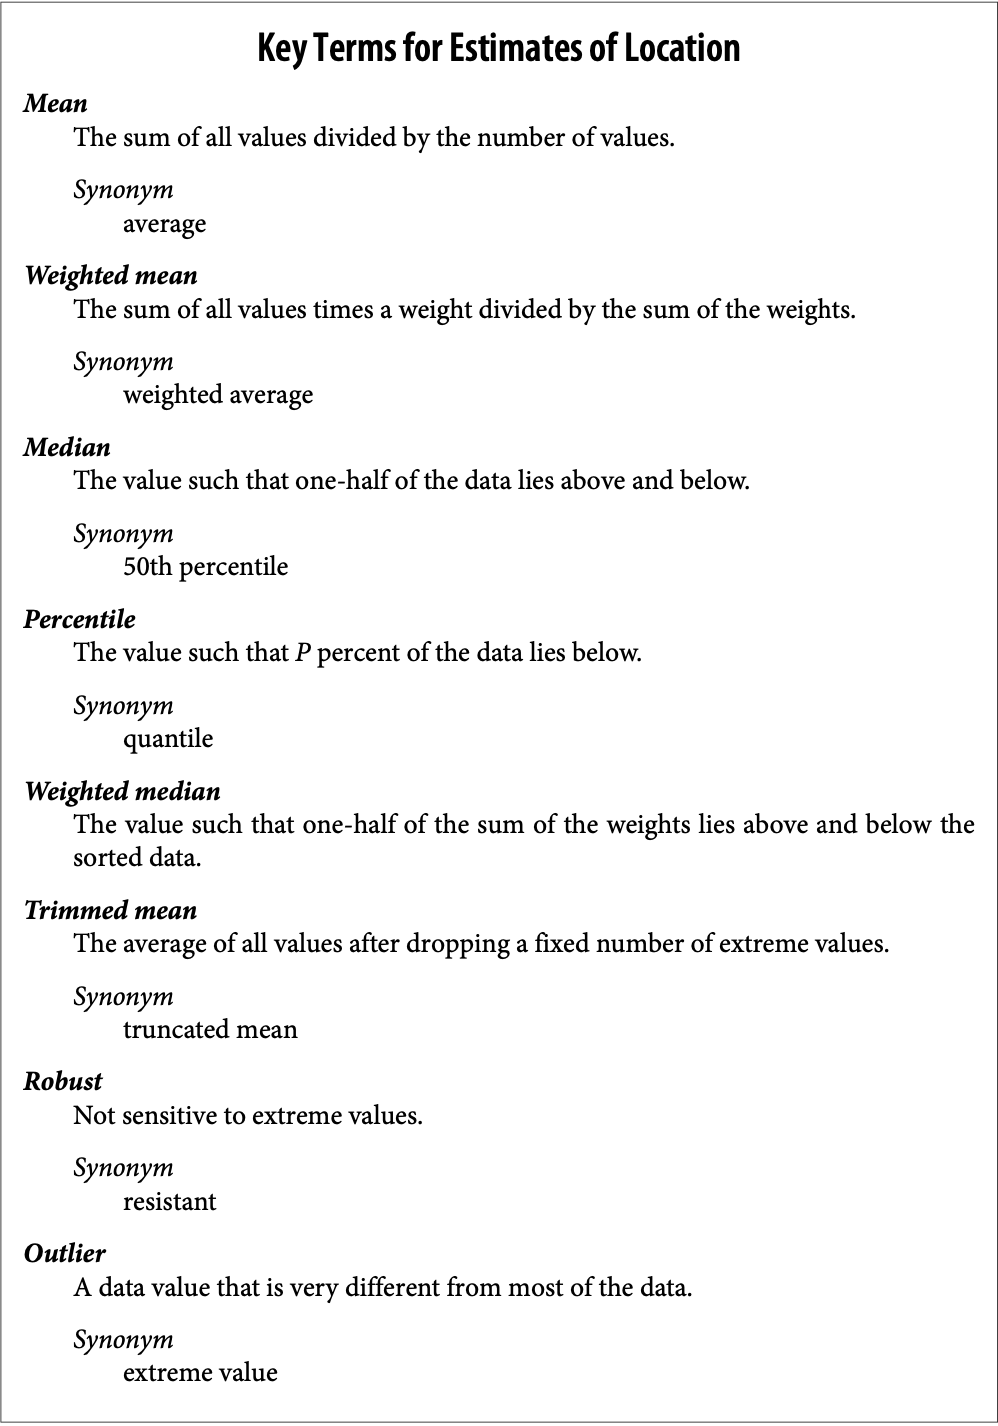

***Metrics and Estimates*** 

Statisticians often use the term estimate for a value calculated from the data at hand, to draw a distinction between what we see from the data and the theoretical true or exact state of affairs. 

Data scientists and business analysts are more likely to refer to such a value as a metric. 

The difference reflects the approach of statistics versus that of data science: accounting for uncertainty lies at the heart of the discipline of statistics, whereas concrete business or organizational objectives are the focus of data science. Hence, statisticians estimate, and data scientists measure.

#Example of a **Trimmed Mean**
Let's say, as an example, a figure skating competition produces the following scores: 6.0, 8.1, 8.3, 9.1, and 9.9.

The mean for the scores would equal:

((6.0 + 8.1 + 8.3 + 9.1 + 9.9) / 5) = 8.28
To trim the mean by a total of 40%, we remove the lowest 20% and the highest 20% of values, eliminating the scores of 6.0 and 9.9.

Next, we calculate the mean based on the calculation:

(8.1 + 8.3 + 9.1) / 3 = 8.50
In other words, a mean trimmed at 40% would equal 8.5 versus 8.28, which reduced the outlier bias and had the effect of increasing the reported average by 0.22 points.

Another type of mean is a weighted mean, which you calculate by multiplying each data value xi by a user-specified weight wi and dividing their sum by the sum of the weights. The formula for a weighted mean is:




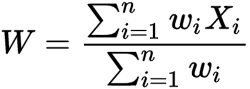






A weighted average or mean is one where each item being averaged is multiplied by a number (weight) based on the item's relative importance, rather than treating each item equally. The weights or weightings are the equivalent of having that many similar items with the same value involved in the average.

#Weighted Median
**bold text**

If you have your five data the median is just the value appearing in the third position. Now, assume you have



```
data weight

13    10
23    03
54    04
```



where the weight is the number of times that a given data appears. Now, you have 17 data. The weighted median is the value in 9th (18/2)position, that is, 13.
In fact, when you compute the median with your data you are actually working with a weighted data



In [3]:
import pandas as pd


In [4]:
state = pd.read_csv("https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/state.csv")
state

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


In [ ]:
state['Population'].mean(),state['Population'].median()

(6162876.3, 4436369.5)

In [ ]:
from scipy.stats import trim_mean
trim_mean(state['Population'], 0.1)

4783697.125

If we want to compute the average murder rate for the country, we need to use a weighted mean or median to account for different populations in the states. 

In [6]:

import numpy as np
np.average(state['Murder.Rate'],weights= state['Population'])

4.445833981123393

**Estimates of Variability**

dispersion, measures whether the data values are tightly clus‐ tered or spread out

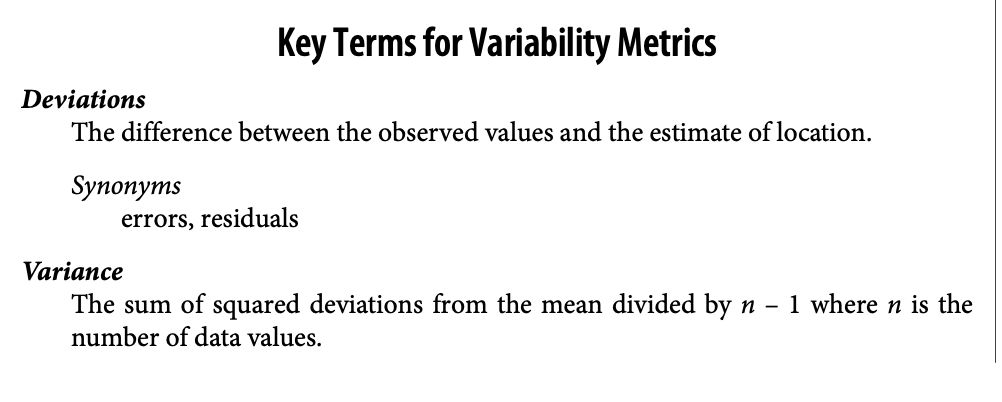
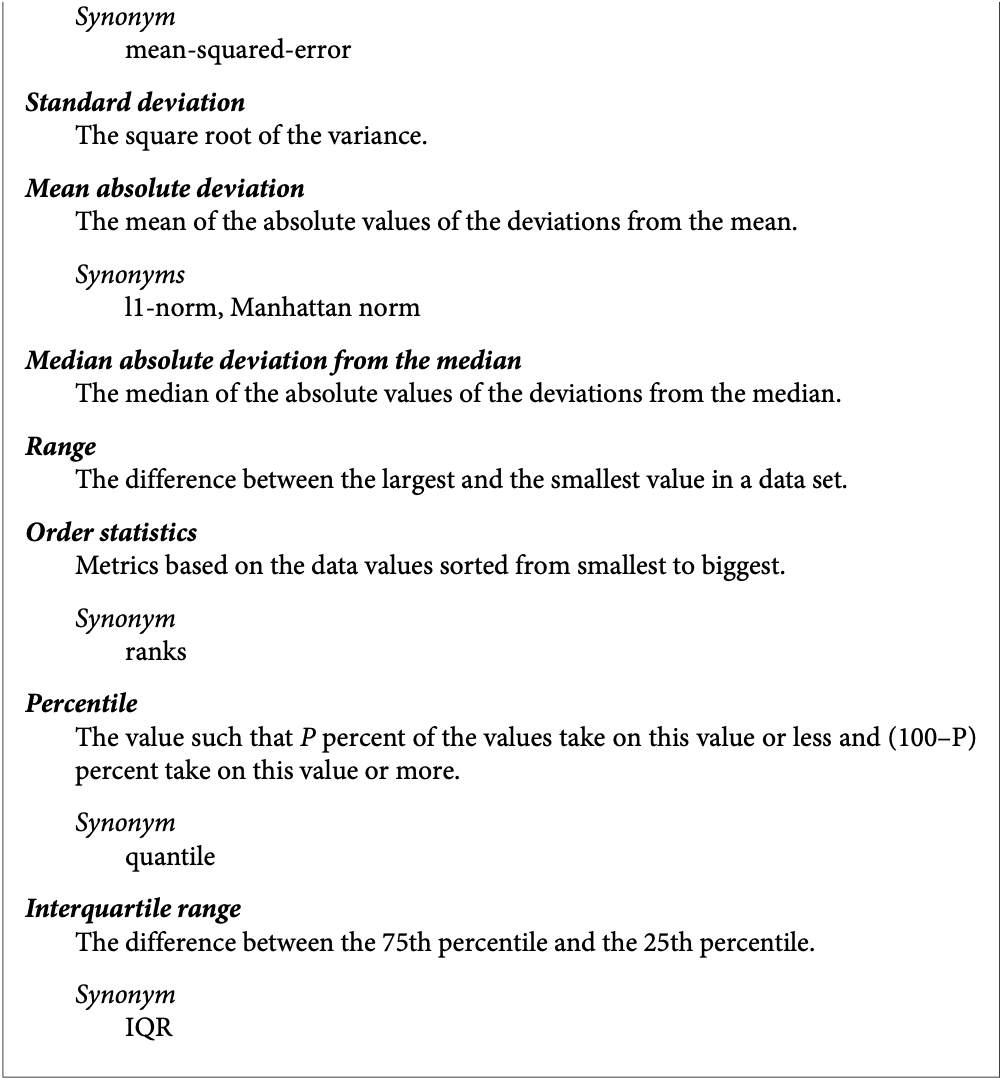

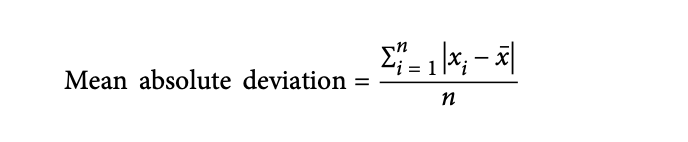
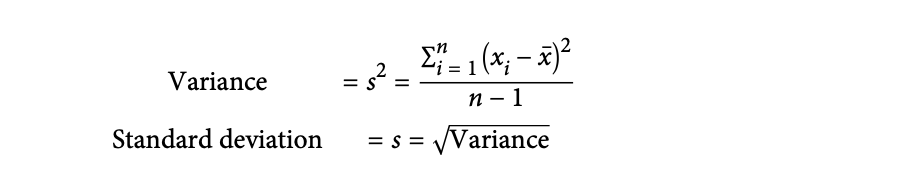

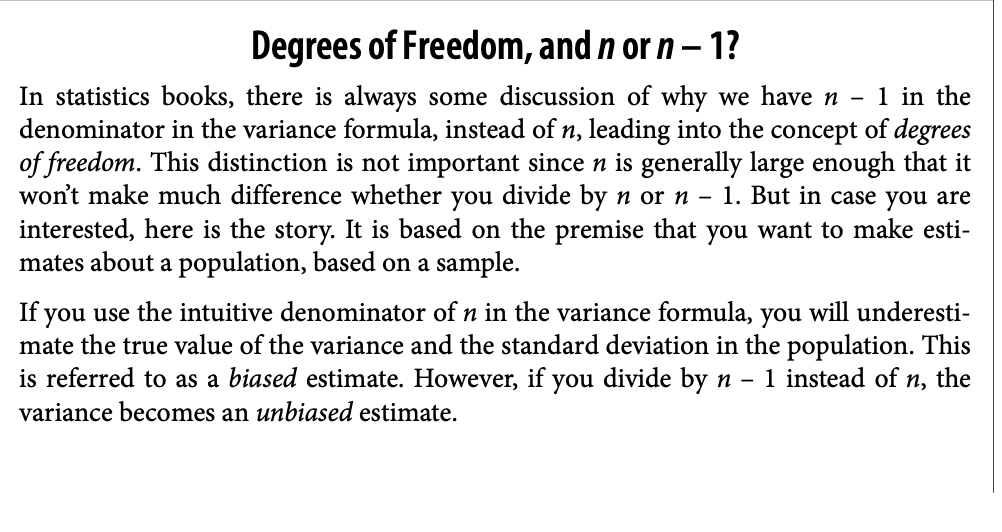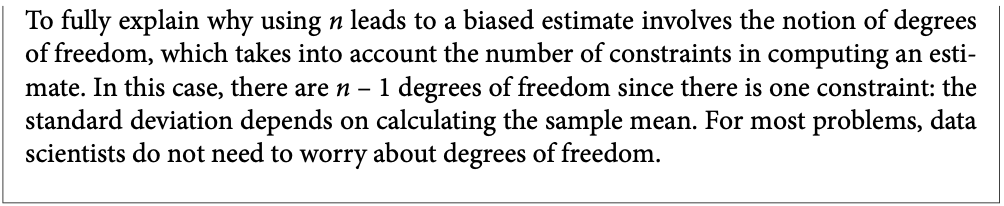

***The variance and standard deviation are especially sensitive to outliers since they are based on the squared deviations.***

A robust estimate of variability is the median absolute deviation from the median or MAD:

Median absolute deviation = Median (|x1 − m| , |x2 − m| ,..., |xN − m|)
where m is the median.

***Like the median, the MAD is not influenced by extreme values.***

In [10]:
from statsmodels.robust.scale import mad
  
print(state['Population'].std())
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))
print(mad(state['Population']))

6848235.347401142
4847308.0
3849876.1459979336


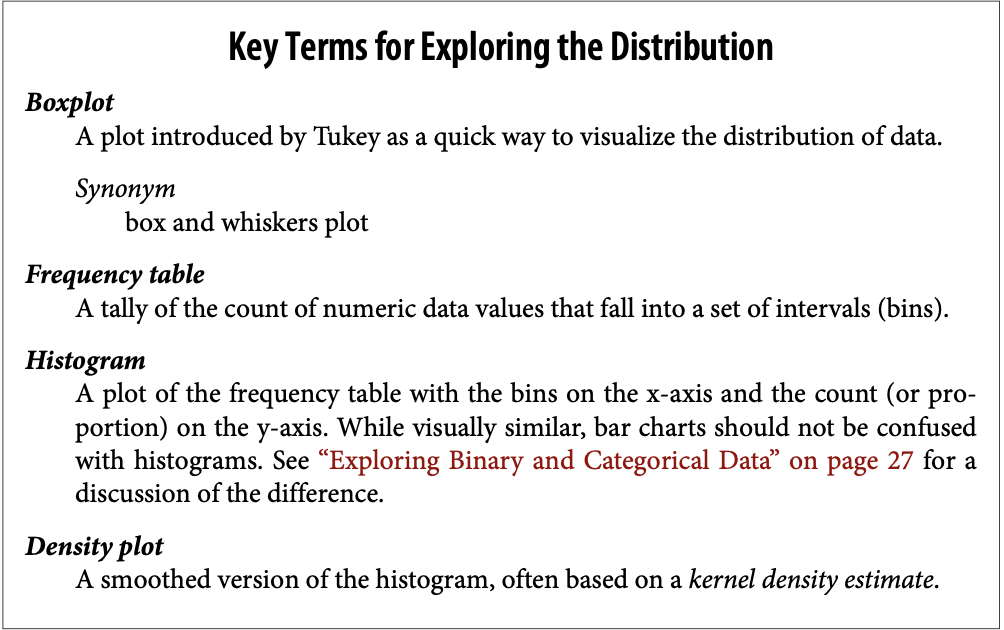

In [11]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])


0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

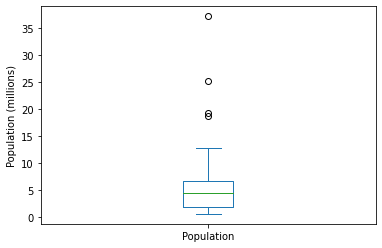

In [16]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

From this boxplot we can immediately see that the median state population is about 5 million, half the states fall between about 2 million and about 7 million, and there are some high population outliers. The top and bottom of the box are the 75th and 25th percentiles, respectively. The median is shown by the horizontal line in the box. The dashed lines, referred to as whiskers, extend from the top and bottom of the box to indicate the range for the bulk of the data. There are many variations of a boxplot;

#**Frequency Tables and Histograms**

A frequency table of a variable divides up the variable range into equally spaced segments and tells us how many values fall within each segment.

In [20]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Population (millions)')

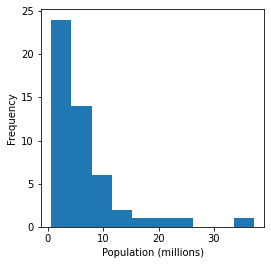

In [24]:
ax = (state['Population'] / 1000000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')


#**Statistical Moments**
In statistical theory, location and variability are referred to as the first and second moments of a distribution. The third and fourth moments are called skewness and kurtosis. Skewness refers to whether the data is skewed to larger or smaller values, and kurtosis indicates the propensity of the data to have extreme values. Generally, metrics are not used to measure skewness and kurtosis; instead, these are discovered through visual displays

Skewness = (Mean-Mode)/SD = 3*(Mean-Median)/SD

Since, (Mode = 3*Median-2*Mean)

ref:https://www.analyticsvidhya.com/blog/2022/01/moments-a-must-known-statistical-concept-for-data-science/

#**kurtosis**

– It measures the amount in the tails and outliers.

– It focuses on the tails of the distribution and explains whether the distribution is flat or rather with a high peak. This measure informs us whether our distribution is richer in extreme values than the normal distribution.

For Example, For a normal distribution, the value of Kurtosis equals 3

For Kurtosis not equal to 3, there are the following cases:

– Kurtosis<3 [Lighter tails]: Negative kurtosis indicates a broad flat distribution.

– Kurtosis>3 [Heavier tails]: Positive kurtosis indicates a thin pointed distribution.


Text(0.5, 0, 'Murder Rate (per 100,000)')

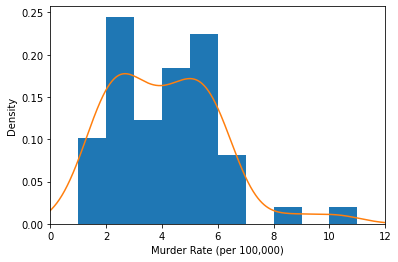

In [42]:
modeee = state['Population'].mode().max() # Mode 
meann = state['Population'].mean()
sd = state['Population'].std()
median = state['Population'].median()


ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')



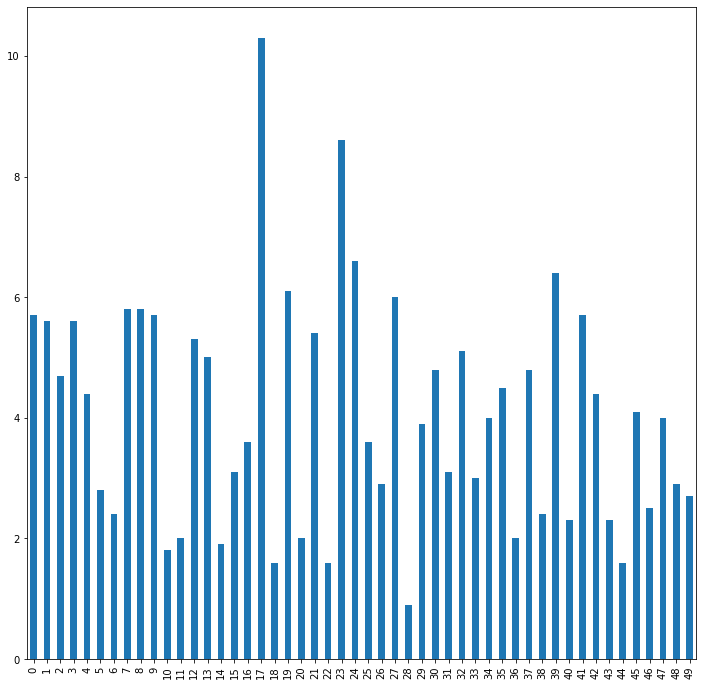

In [50]:
state['Murder.Rate'].plot.bar(figsize=(12, 12), legend=False)
 

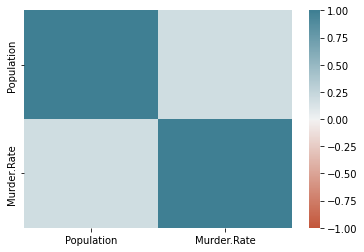

In [51]:
import seaborn as sns
sns.heatmap(state.corr(), vmin=-1, vmax=1,
                cmap=sns.diverging_palette(20, 220, as_cmap=True))
